In [14]:
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Activation, Dropout
from tensorflow.keras.utils import to_categorical, plot_model

In [2]:
#load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
#compute the number of labels
num_labels = len(np.unique(y_train))

In [4]:
#convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [7]:
#input image dimensions
image_size = x_train.shape[1]
#resize and normalize
x_train = x_train.reshape(-1, image_size, image_size, 1)
x_test = x_test.reshape(-1, image_size, image_size, 1)
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [8]:
# network parameters
# image is processed as is (square grayscale)
input_shape = (image_size, image_size, 1)
batch_size = 128
kernel_size = 3
pool_size = 2
filters = 64
dropout = 0.2

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dropout (Dropout)            (None, 576)              

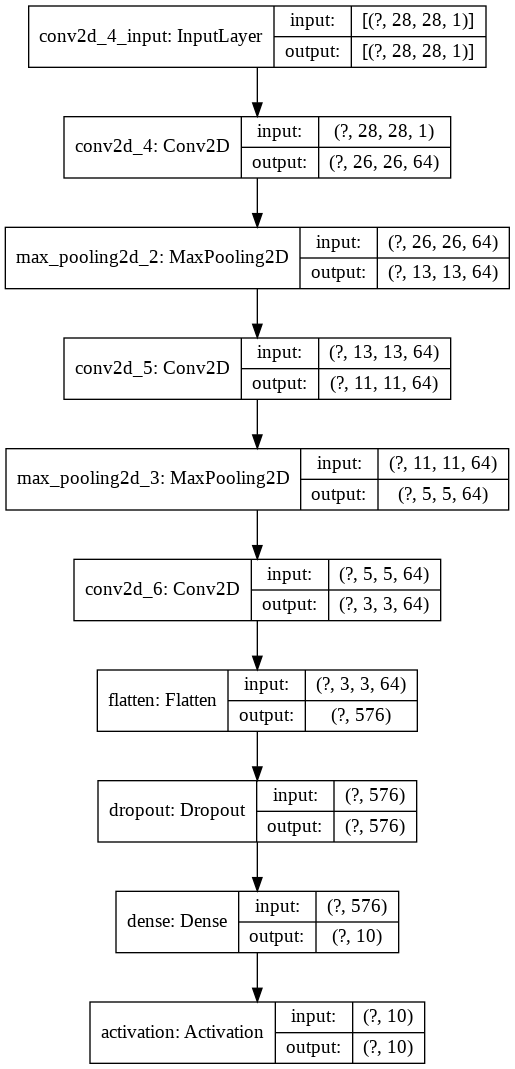

In [15]:
# model is a stack of CNN-ReLU-MaxPooling
model = Sequential()
model.add(Conv2D(filters=filters,
kernel_size=kernel_size,
activation='relu',
input_shape=input_shape))
model.add(MaxPooling2D(pool_size))
model.add(Conv2D(filters=filters,
kernel_size=kernel_size,
activation='relu'))
model.add(MaxPooling2D(pool_size))
model.add(Conv2D(filters=filters,
kernel_size=kernel_size,
activation='relu'))
model.add(Flatten())
# dropout added as regularizer
model.add(Dropout(dropout))
# output layer is 10-dim one-hot vector
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()
plot_model(model, to_file='cnn-mnist.png', show_shapes=True)

In [16]:
# loss function for one-hot vector
# use of adam optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
optimizer='adam',
metrics=['accuracy'])
# train the network
model.fit(x_train, y_train, epochs=10, batch_size=batch_size)

Epoch 1/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2754 - accuracy: 0.9154
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0663 - accuracy: 0.9797
Epoch 3/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0481 - accuracy: 0.9844
Epoch 4/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0377 - accuracy: 0.9880
Epoch 5/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0314 - accuracy: 0.9902
Epoch 6/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0276 - accuracy: 0.9912
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0229 - accuracy: 0.9927
Epoch 8/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0195 - accuracy: 0.9939
Epoch 9/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0175 - accuracy: 0.9944
Epoch 10/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0165 - accuracy: 0.9946

In [18]:
_, acc = model.evaluate(x_test,
y_test,
batch_size=batch_size,
verbose=0)
print("\nTest accuracy: %.2f%%" % (100.0 * acc))


Test accuracy: 99.21%
